In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
%matplotlib inline
from IPython import display
from ipywidgets import interact, widgets

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['label'] = y

In [3]:
df['alphalabel'] = df['label'].map({int(a):b for a,b in np.c_[df.label.unique(),iris.target_names]})

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,alphalabel
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
def histogramer(feature,bins):
    for i in df.alphalabel.unique():
        df.loc[df['alphalabel'] == i, feature].plot(kind='hist',alpha=0.4,bins=bins,figsize=(14,8))

In [6]:
interact(histogramer,feature=df.columns[:4],bins=widgets.IntSlider(min=1,max=30,step=1,value=15))

interactive(children=(Dropdown(description='feature', options=('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'), value='sepal length (cm)'), IntSlider(value=15, description='bins', max=30, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.histogramer>

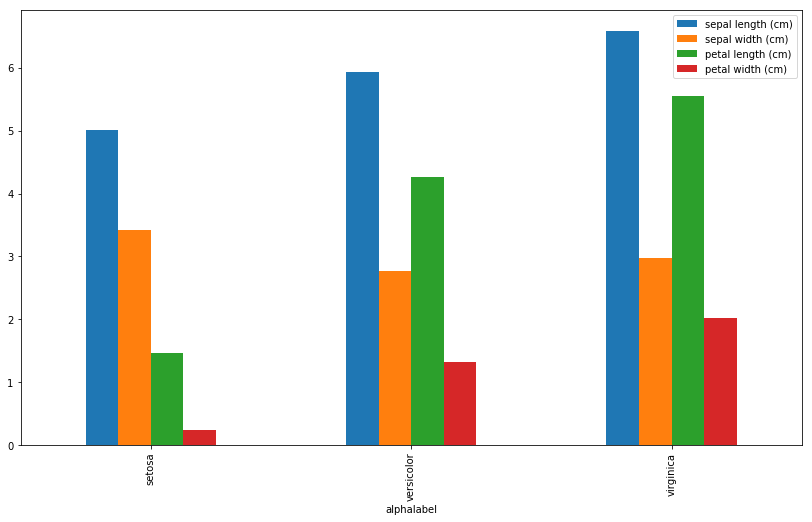

In [7]:
df.groupby('alphalabel')[df.columns[:4]].mean().plot(kind='bar',figsize=(14,8))

In [14]:
def estimator(blackLine,redLine):
    estimate = []
    for index, row in df.iterrows():
        if row['petal length (cm)'] < blackLine:
            estimate.append(int(0))
        elif row['petal length (cm)'] > redLine:
            estimate.append(int(2))
        else:
            estimate.append(int(1))
            
    df['y_pred'] = estimate
    
    for i in df.alphalabel.unique():
        df.loc[df['alphalabel'] == i, 'petal length (cm)'].plot(kind='hist',alpha=0.4,figsize=(14,8))
    plt.axvline(blackLine,c='k')
    plt.axvline(redLine,c='r')
        
    print('Accuracy Score: %f'%accuracy_score(df.label,df.y_pred))

In [15]:
interact(estimator,blackLine=widgets.FloatSlider(min=df['petal length (cm)'].min(),max=df['petal length (cm)'].max(),step=0.1,value=4.0),redLine=widgets.FloatSlider(min=df['petal length (cm)'].min(),max=df['petal length (cm)'].max(),step=0.1,value=4.0))

interactive(children=(FloatSlider(value=4.0, description='blackLine', max=6.9, min=1.0), FloatSlider(value=4.0, description='redLine', max=6.9, min=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.estimator>